# Exercise 03 - Autoregressive Integrated Moving Average Models

### MIIIA

by 
        - Camilo Suárez            ca.suarezt    200321493
        - Jhon Alexander Hernández ja.hernandezp 200920588
        - Fernando Pérez           f-perez       200222809
        - Elquin Huertas           e.huertas     201920061

- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

In [14]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf

In [15]:
data = pd.read_csv('C:/Users/elqui/OneDrive/Documentos/GitHub/AdvancedMethodsDataAnalysisClass/datasets/data_arma.csv', skiprows=0)
data.head()

,Unnamed: 0,ts1,ts2,ts3,ts4
0,0,0.533570,-0.126804,-0.802837,1.812825
1,1,1.240130,1.314360,-0.595602,0.042764
2,2,1.618598,1.405994,0.127180,-1.759427
3,3,1.140465,3.132621,0.958586,-0.456798
4,4,0.481561,3.179083,0.164598,-1.254790


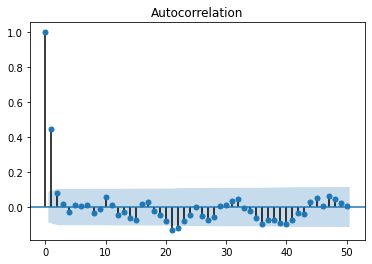

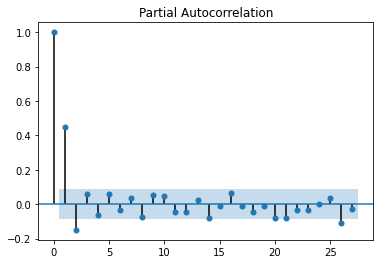

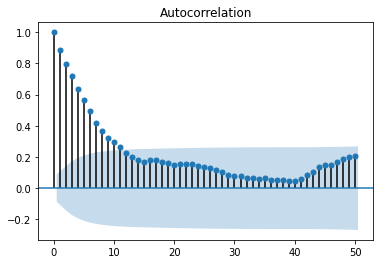

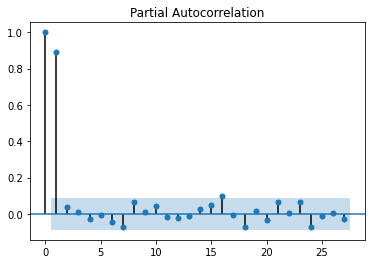

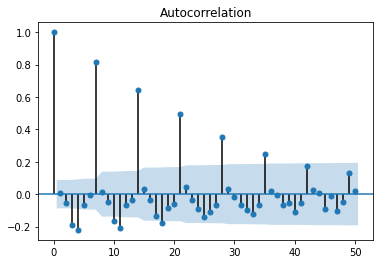

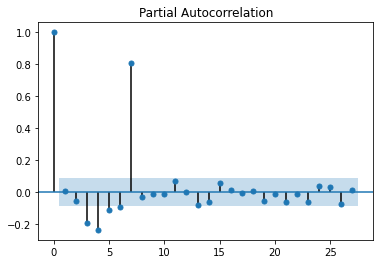

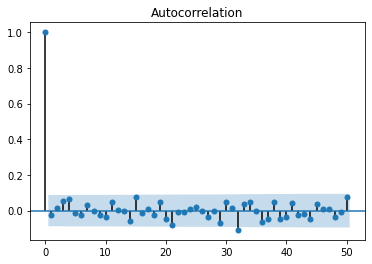

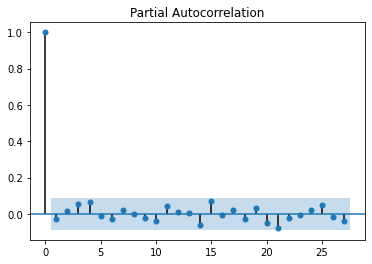

In [16]:
evaluate = [data.ts1, data.ts2, data.ts3, data.ts4]
for x in evaluate:
    plot_acf(x, lags=50);
    plot_pacf(x);

* TS1: MA(1) proceso media móvil de orden 1.
* TS2: AR(1) Proceso autoregresivo de orden 1.
* TS3: AR(7) Proceso autoregresivo de orden 7.
* TS4: Caminata aleatoria, no hay ningún rezago significativo en el ACF ni en el PACF 

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the rmse of the rolling forecast


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


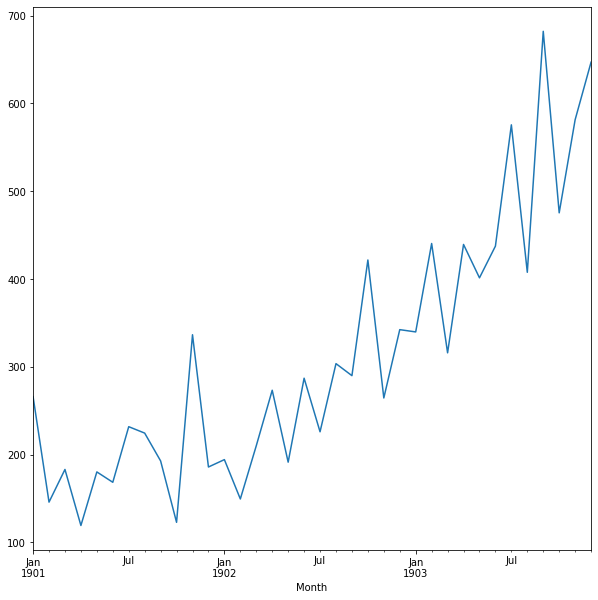

In [17]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('C:/Users/elqui/OneDrive/Documentos/GitHub/AdvancedMethodsDataAnalysisClass/datasets/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(10, 10));

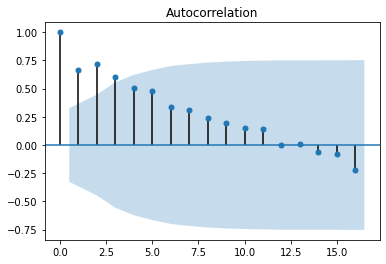

In [18]:
plot_acf(series);

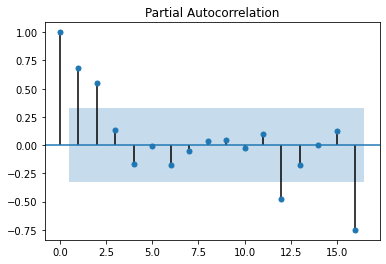

In [19]:
plot_pacf(series);

In [20]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -197.814
Method:                       css-mle   S.D. of innovations             67.833
Date:                Sat, 20 Jun 2020   AIC                            403.628
Time:                        17:10:06   BIC                            409.849
Sample:                    02-01-1901   HQIC                           405.775
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6504      4.907      2.374      0.024       2.034      21.267
ar.L1.D.Sales    -1.0223      0.167     -6.109      0.000      -1.350      -0.694
ar.L2.D.Sales    -0.3655      0.167     

C:\Users\elqui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\elqui\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


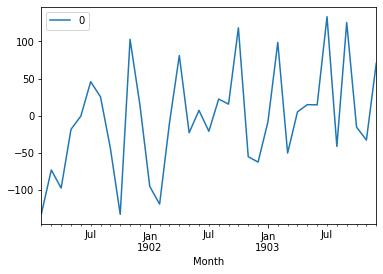

In [21]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

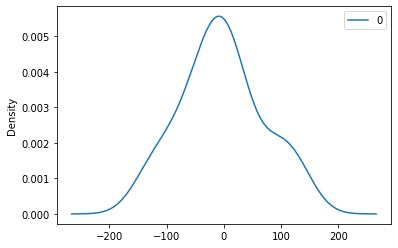

                0
count   35.000000
mean    -3.927333
std     71.118405
min   -132.795705
25%    -47.082981
50%     -8.308474
75%     23.822062
max    133.295961


In [22]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [28]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(6,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=352.377311, expected=342.300000
predicted=307.740519, expected=339.700000
predicted=391.570186, expected=440.400000
predicted=354.431113, expected=315.900000
predicted=389.660232, expected=439.300000
predicted=352.595800, expected=401.300000
predicted=449.205128, expected=437.400000
predicted=399.951043, expected=575.500000
predicted=440.644853, expected=407.600000


C:\Users\elqui\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\elqui\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\elqui\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\elqui\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=620.627519, expected=682.000000
predicted=449.567803, expected=475.300000
predicted=665.409663, expected=581.300000
predicted=575.991821, expected=646.900000


In [26]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)**0.5
print('Test RMSE: %.3f' % error)

Test RMSE: 67.029


* order=(1,1,0) - RMSE: 84.388
* order=(2,1,0) - RMSE: 75.432
* order=(3,1,0) - RMSE: 83.660
* order=(4,1,0) - RMSE: 81.545
* order=(5,1,0) - RMSE: 83.417
* order=(6,1,0) - RMSE: 82.523

* order=(1,2,0) - RMSE: 136.411
* order=(2,2,0) - RMSE: 99.302
* order=(3,2,0) - RMSE: 102.534
* order=(4,2,0) - RMSE: 87.157
* order=(5,2,0) - RMSE: 81.918
* order=(6,2,0) - RMSE: 79.127

* order=(1,1,1) - RMSE: 83.688
* order=(2,1,1) - RMSE: 88.089
* order=(3,1,1) - RMSE: 84.533
* order=(4,1,1) - RMSE: 82.439

* order=(6,1,1) - RMSE: 67.029



* Al colocar el parametro Q>1 no se encuentran resultados para el modelo.
* Al colocar el parametro D>1 no se encuentran resultados para el modelo
* El modelo que minimiza el RMSE es un ARIMA(6,1,1).


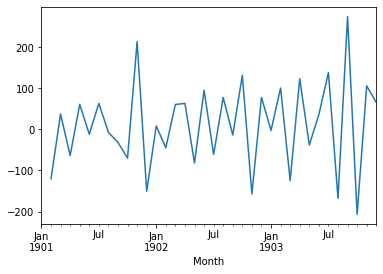

In [29]:
series.diff().plot()

ADF Statistic: -7.249074
p-value: 0.000000
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


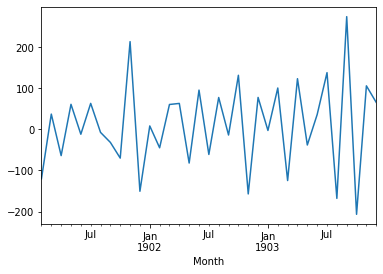

In [30]:
ts1 = series.diff().iloc[1:]
ts1.plot()
result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

* Con una significancia del 5%, la serie diferenciada es estacionaria. 